In [36]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math

In [37]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
game_stats = game_stats[game_stats["totalGoals"] < 10]  # remove outliers 99% of games will be kept
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats = game_stats.drop_duplicates()
game_stats = game_stats.dropna()

game_stats

,Unnamed: 0,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
0,0,10,29,14.3,NaN,0,0,0,0,14,20,40.0,NaN,0,0,0,0,7
1,1,9,31,0.0,NaN,17,4,18,19,11,21,0.0,NaN,8,3,11,30,4
2,2,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
3,3,8,30,0.0,NaN,15,1,12,12,4,32,0.0,NaN,13,3,5,14,3
4,4,18,33,33.3,NaN,23,13,18,24,20,29,0.0,NaN,8,8,9,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21387,21387,18,28,25.0,NaN,20,10,12,28,18,24,25.0,NaN,15,6,13,33,7
21388,21388,8,32,60.0,NaN,12,3,14,11,10,25,25.0,NaN,8,3,10,13,5
21389,21389,39,24,0.0,NaN,10,5,12,27,23,19,0.0,NaN,21,10,7,29,3
21390,21390,4,37,75.0,49.0,6,3,11,9,8,21,0.0,51.0,10,3,2,17,5


### Partition Training & Testing Data

In [38]:
features = np.array(game_stats.loc[:, game_stats.columns != 'totalGoals'],  dtype='float32')
targets = np.array(game_stats['totalGoals'], dtype='float32')

x_train = features[:int(features.shape[0] * 0.8)]
t_train = targets[:int(targets.shape[0] * 0.8)]

x_test = features[int(features.shape[0] * 0.8):]
t_test = targets[int(targets.shape[0] * 0.8):]

### Define Closed Form Linear Regression

In [39]:
def cf_lin_reg(X : np.array, t : np.array) -> np.array:
    '''
    cf_lin_reg:
        - Closed form solution for linear regression

    Params:
        - X: numpy array of features w/ shape (d, M)
        - t: numpy array of targets w/ shape (d, 1)
        
    Returns:
        - w_hat: numpy array of optimal weights w/ shape (M, 1)
    '''
    X_trans = X.transpose()
    w_hat = inv(X_trans.dot(X)).dot(X_trans).dot(t)
    return w_hat

### Compute optimal weights for training data

In [40]:
w_hat = cf_lin_reg(x_train, t_train)
w_hat

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan], dtype=float32)

### Define Prediction

In [41]:
def predict(X : np.array, w : np.array) -> np.array:
    '''
    predict:
        - Predicts targets using given weights

    Params:
        - X: numpy array of features w/ shape (d, M)
        - w: numpy array of weights w/ shape (M, 1)
        
    Returns:
        - t_hat: numpy array of predicted targets w/ shape (d, 1)
    '''
    t_hat = X.dot(w)
    return t_hat

### Make predictions (t_hat), plot both predictions and true targets

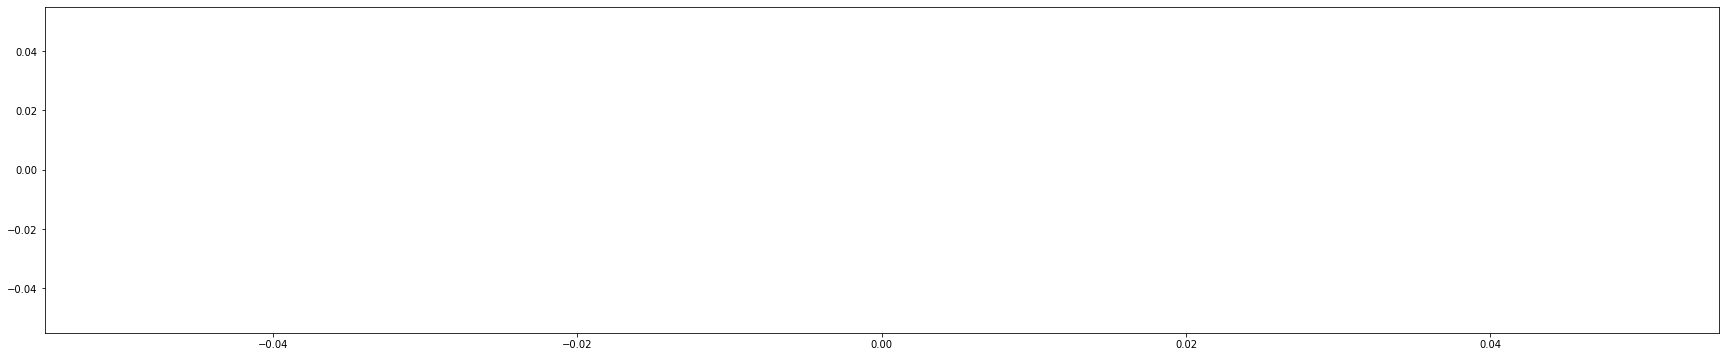

In [42]:
t_hat = predict(x_train, w_hat)
plt.rcParams["figure.figsize"] = (30, 6)
plt.plot(t_hat)

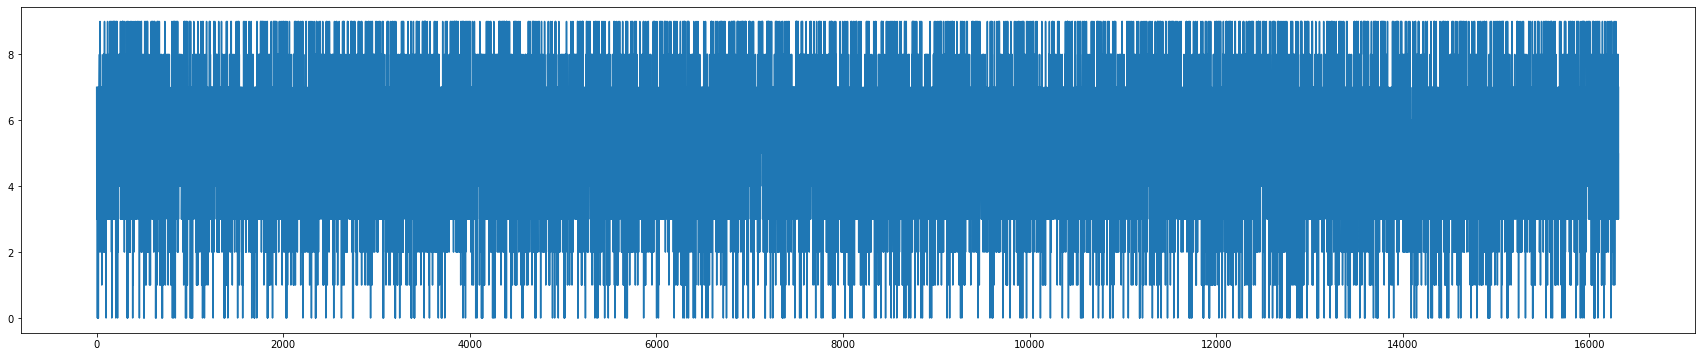

In [43]:
plt.plot(t_train)

### Plot prediction and true target distributions

array([[<AxesSubplot:title={'center':'predictions'}>,
        <AxesSubplot:title={'center':'targets'}>]], dtype=object)

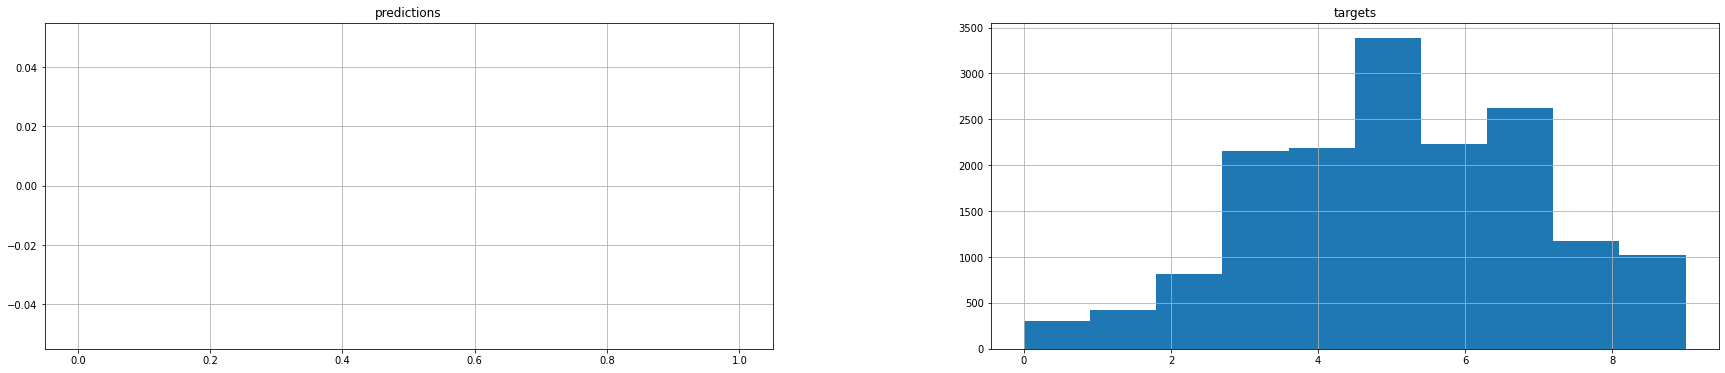

In [44]:
pred_and_targets_df = pd.DataFrame({'predictions': t_hat, 'targets': t_train})
pred_and_targets_df.hist()

### Analyze 'Training' Loss of Closed Form Solution

In [45]:
def avg_loss(X : np.array, t : np.array, w : np.array) -> float:
    '''
    avg_loss:
        - Average loss of predictions

    Params:
        - X: numpy array of features w/ shape (d, M)
        - t: numpy array of targets w/ shape (d, 1)
        - w: numpy array of weights w/ shape (M, 1)
        
    Returns:
        - avg_loss: float
    '''
    t_hat = predict(X, w)
    losses = [(pred - target) ** 2 for pred, target in zip(t_hat, t)]
    avg_loss = np.sum(losses) / len(losses)
    
    return losses, avg_loss

In [46]:
losses, average_loss = avg_loss(x_train, t_train, w_hat)
abs_losses = [math.sqrt(loss) for loss in losses]
min_loss = min(losses)
max_loss = max(losses)

print("------- Squared Error Loss -------")
print(f"Average loss: {average_loss}")
print(f"Min loss: {min_loss}")
print(f"Max loss: {max_loss}\n")

print("------- Absolute Error -------")
print(f"Average loss: {math.sqrt(average_loss)}")
print(f"Min loss: {math.sqrt(min_loss)}")
print(f"Max loss: {math.sqrt(max_loss)}")

------- Squared Error Loss -------
Average loss: nan
Min loss: nan
Max loss: nan

------- Absolute Error -------
Average loss: nan
Min loss: nan
Max loss: nan


### Absolute Loss Distribution of 'Training' loss

<AxesSubplot:>

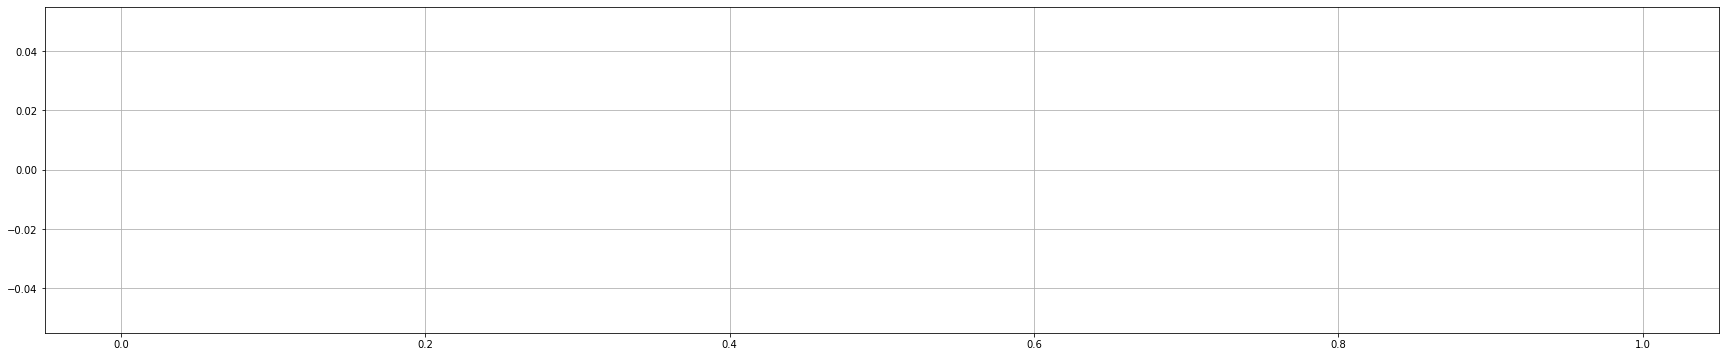

In [47]:
losses_df = pd.DataFrame()
losses_df["loss"] = abs_losses
losses_df["loss"].hist()

### Explore Performance on Unseen Data

In [48]:
losses, average_loss = avg_loss(x_test, t_test, w_hat)
abs_losses = [math.sqrt(loss) for loss in losses]
min_loss = min(losses)
max_loss = max(losses)

print("------- Squared Error Loss -------")
print(f"Average loss: {average_loss}")
print(f"Min loss: {min_loss}")
print(f"Max loss: {max_loss}\n")

print("------- Absolute Error -------")
print(f"Average loss: {math.sqrt(average_loss)}")
print(f"Min loss: {math.sqrt(min_loss)}")
print(f"Max loss: {math.sqrt(max_loss)}")

------- Squared Error Loss -------
Average loss: nan
Min loss: nan
Max loss: nan

------- Absolute Error -------
Average loss: nan
Min loss: nan
Max loss: nan


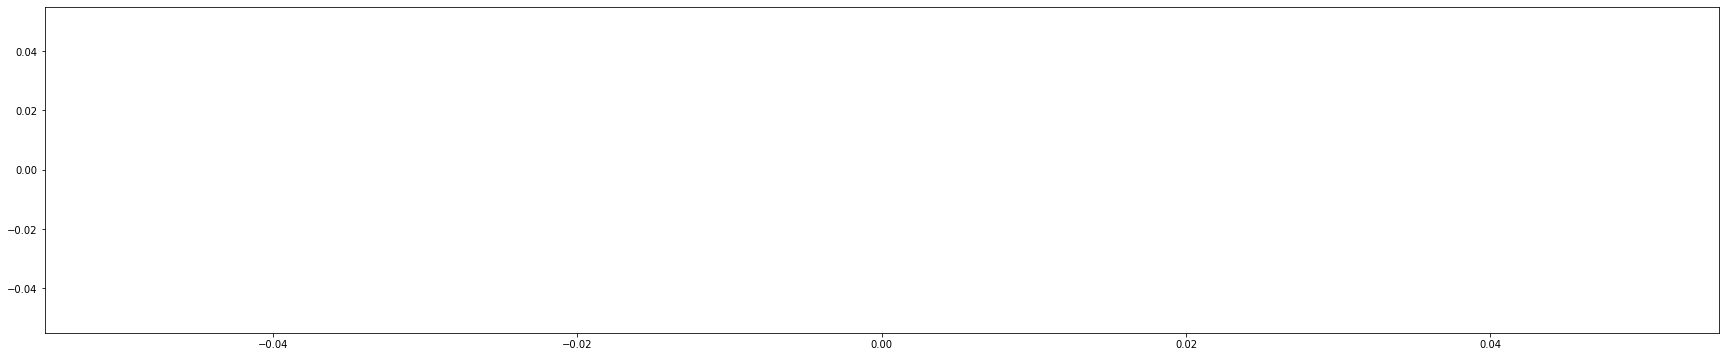

In [49]:
t_hat = predict(x_test, w_hat)
plt.plot(t_hat)

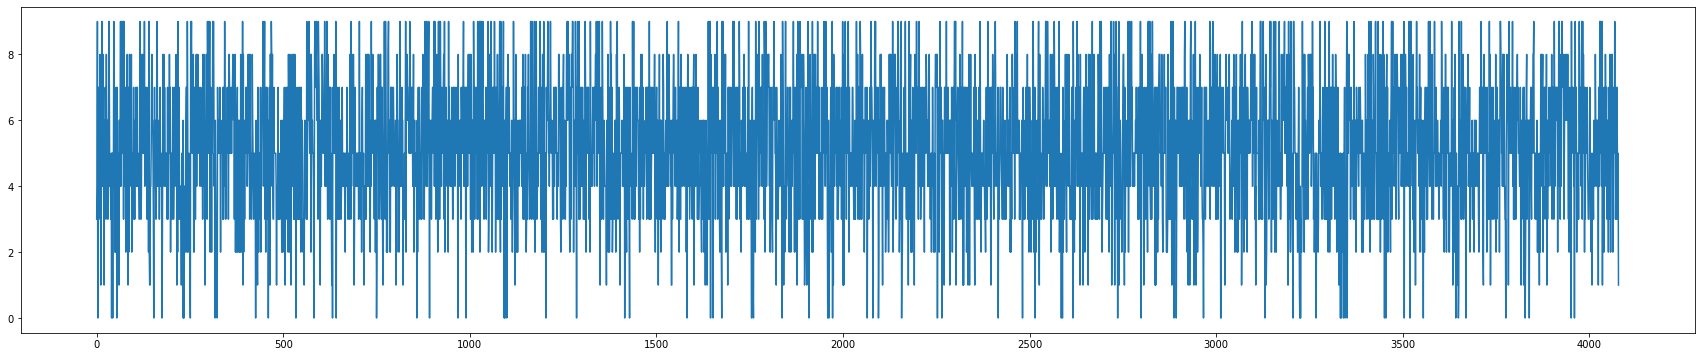

In [50]:
plt.plot(t_test)

array([[<AxesSubplot:title={'center':'predictions'}>,
        <AxesSubplot:title={'center':'targets'}>]], dtype=object)

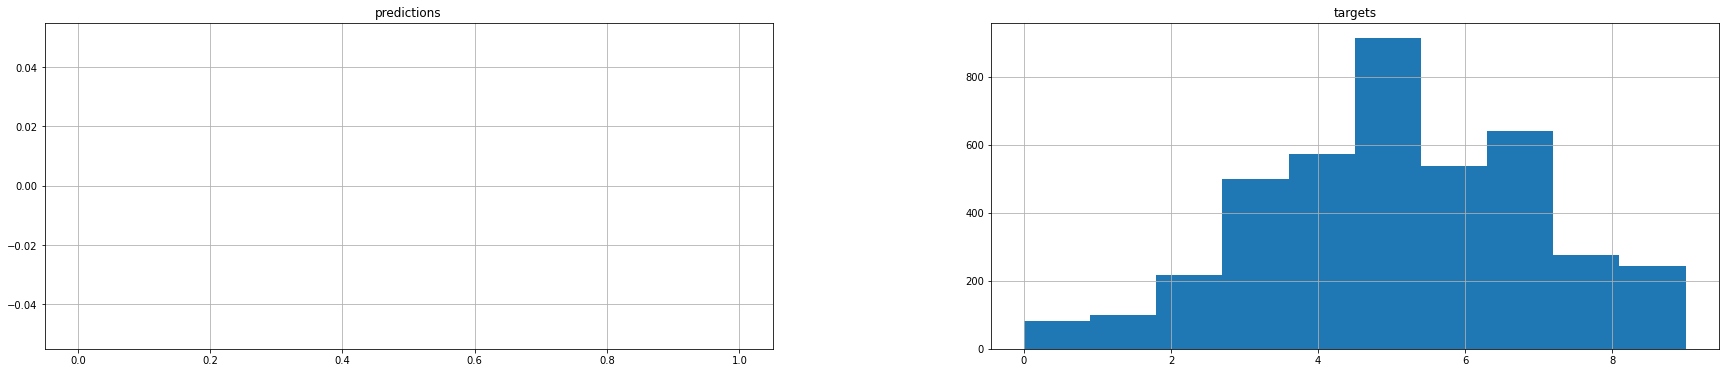

In [51]:
pred_and_targets_df = pd.DataFrame({'predictions': t_hat, 'targets': t_test})
pred_and_targets_df.hist()

<AxesSubplot:>

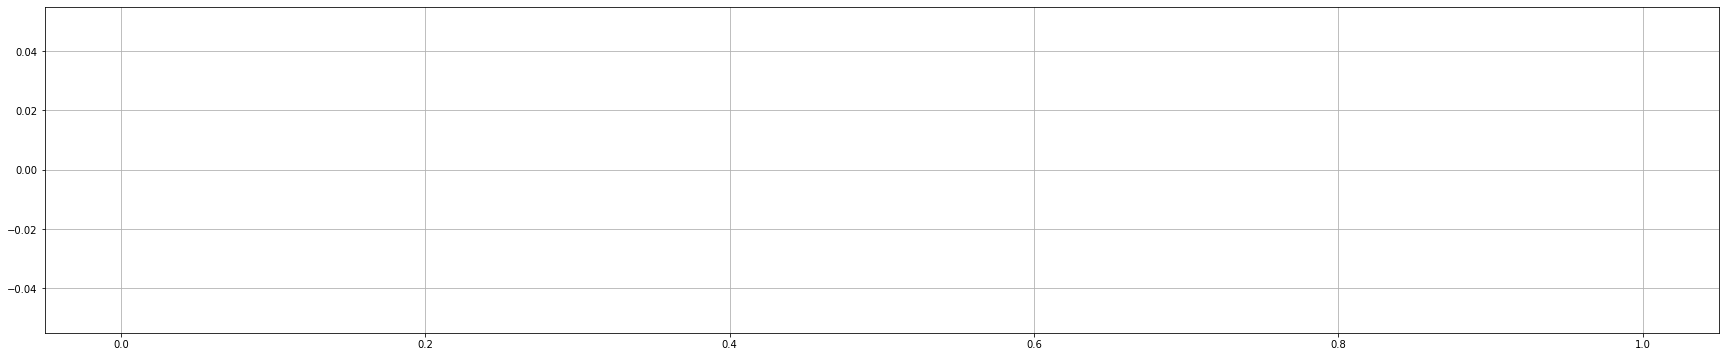

In [52]:
losses_df = pd.DataFrame()
losses_df["loss"] = abs_losses
losses_df["loss"].hist()